Axolotl_Brain_multi_slice

In [1]:
import random
import numpy as np
import scanpy as sc
import torch
import argparse
import yaml
from yaml import SafeLoader
from package.data_processing import LoadBatchAdata
from package.model import STAMGC
import warnings


warnings.filterwarnings('ignore')
import os
os.chdir('/home/lsfcj/lsf/第一个工作3.0')

In [2]:
file_fold='/data/lsfcj/DATA'

args = argparse.Namespace(
    catalogue='Multi_slice',
    dataset='Axolotl_Brain',
    parameter='integration_cross_stage',
    slice_list=['Stage54_data','Stage57_data'],#'Stage44_data',
    batch_size=2,
    path3='/Axolotl_Brain_5457',
    platform='Stereo_seq',
    spot_size=50,
    config='./train_config.yaml',
    label=True,
)
config = yaml.load(open(args.config), Loader=SafeLoader)[str(args.catalogue)][str(args.parameter)]

path = os.path.join(file_fold, args.platform,args.dataset)

torch.manual_seed(config['seed'])
np.random.seed(config['seed'])
if torch.cuda.is_available():
    torch.cuda.manual_seed(config['seed'])
    torch.cuda.manual_seed_all(config['seed'])
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
random.seed(12345)
os.environ['CUBLAS_WORKSPACE_CONFIG'] = ':4096:8' 
torch.use_deterministic_algorithms(True)

In [3]:
adata=LoadBatchAdata(path,args.catalogue,args.dataset,args.slice_list,config,args,path3=args.path3,join='outer').run()
print(adata)

Load batch data!
Load Stage54_data data!
Load data!
Load label!
Load Stage57_data data!
Load data!
Load label!
Preprocess!
Generate gene expression!
Gaussian smooth data!
Construct  Stage54_data adjacency matrix!
Construct adjacency matrix!
Construct  Stage57_data adjacency matrix!
Construct adjacency matrix!
adata load done!
AnnData object with n_obs × n_vars = 7339 × 3000
    obs: 'CellID', 'spatial_leiden_e30_s8', 'Batch', 'cell_id', 'seurat_clusters', 'Annotation', 'leiden', 'ground_truth', 'slice'
    var: 'n_cells', 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'spatial', 'hvg', 'log1p', 'smooth_r'
    obsm: 'X_pca', 'X_spatial', 'X_umap', 'spatial', 'gene_feat', 'smooth_gene', 'graph_neigh'


In [4]:
# adata=sc.read_h5ad('./results/'+args.catalogue+'/'+args.dataset+args.path3+'/data_processing.h5ad')
# print(adata)

=== Generate pseudo labels! ===


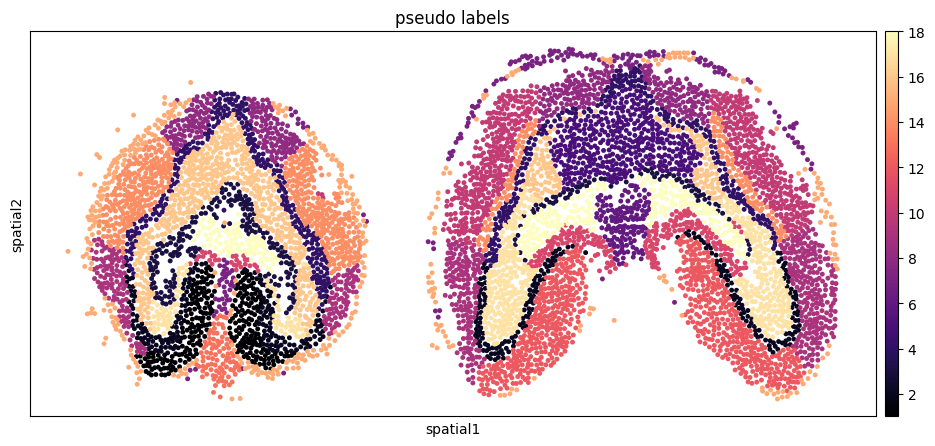

=== train ===
epoch: 0  total_loss: 29.830398559570312  alpha: 20  beta: 0.35  gama: 0.65
epoch: 1  total_loss: 29.114213943481445  alpha: 20  beta: 0.35  gama: 0.65
epoch: 2  total_loss: 28.44259262084961  alpha: 20  beta: 0.35  gama: 0.65
epoch: 3  total_loss: 27.650590896606445  alpha: 20  beta: 0.35  gama: 0.65
epoch: 4  total_loss: 26.821523666381836  alpha: 20  beta: 0.35  gama: 0.65
epoch: 5  total_loss: 25.95773696899414  alpha: 20  beta: 0.35  gama: 0.65
epoch: 6  total_loss: 25.111682891845703  alpha: 20  beta: 0.35  gama: 0.65
epoch: 7  total_loss: 24.33194923400879  alpha: 20  beta: 0.35  gama: 0.65
epoch: 8  total_loss: 23.614471435546875  alpha: 20  beta: 0.35  gama: 0.65
epoch: 9  total_loss: 22.989452362060547  alpha: 20  beta: 0.35  gama: 0.65
epoch: 10  total_loss: 22.473468780517578  alpha: 20  beta: 0.35  gama: 0.65
epoch: 11  total_loss: 22.03865623474121  alpha: 20  beta: 0.35  gama: 0.65
epoch: 12  total_loss: 21.672531127929688  alpha: 20  beta: 0.35  gama: 0.65

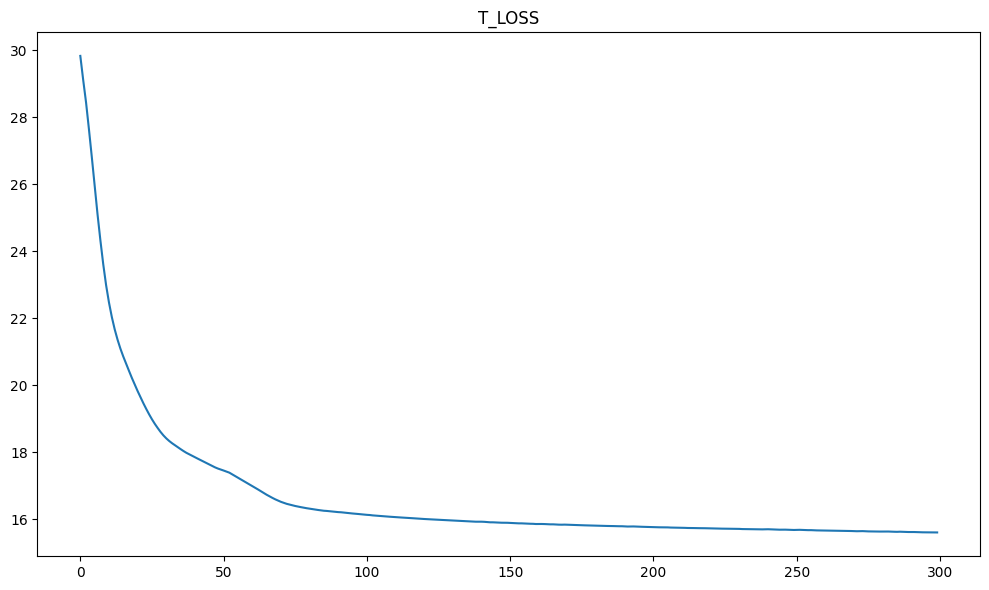

=== load ===
embedding generated, go clustering
calculate metric ARI
ARI: 0.5502169900441399
NMI: 0.6853786282854007


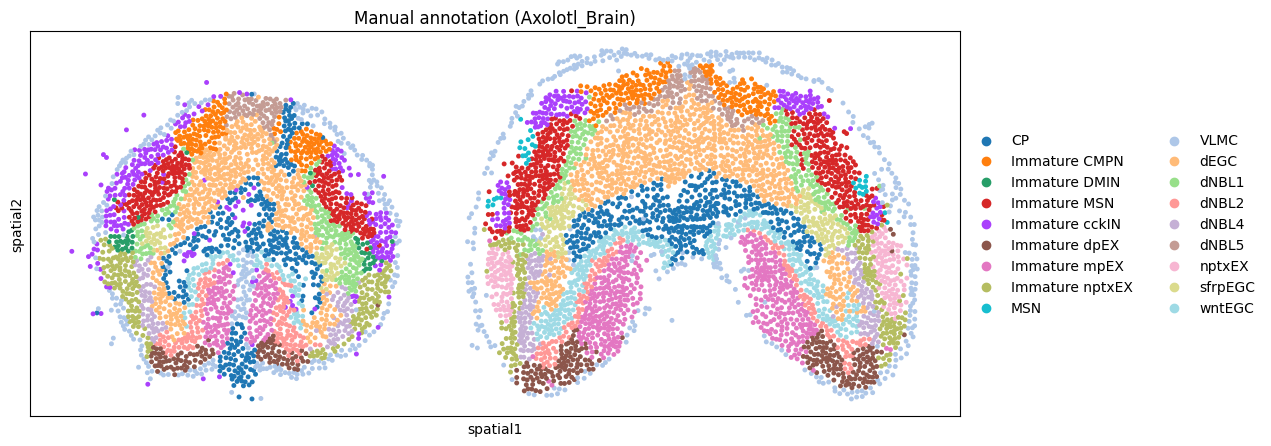

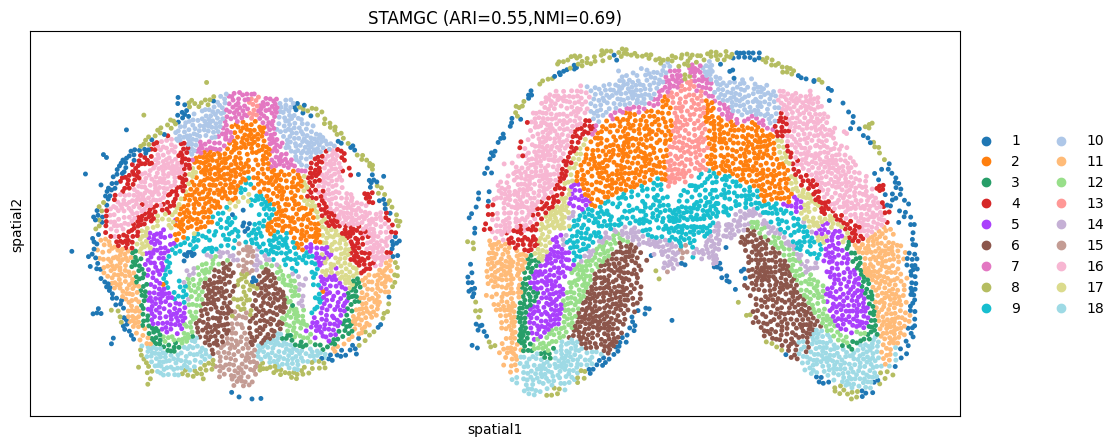

complete!


In [5]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 5)
adata=STAMGC(adata,config,args,path3=args.path3).run()

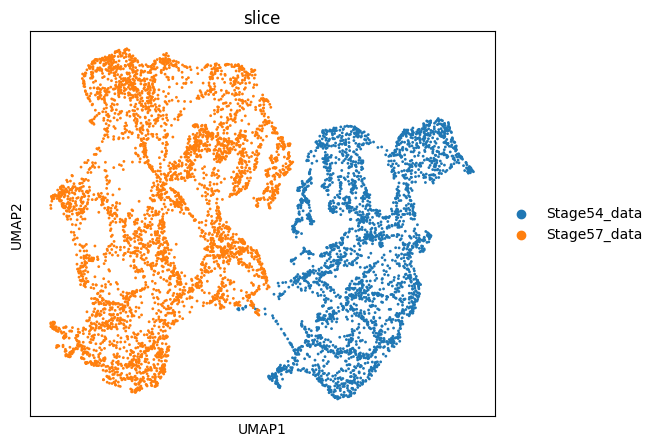

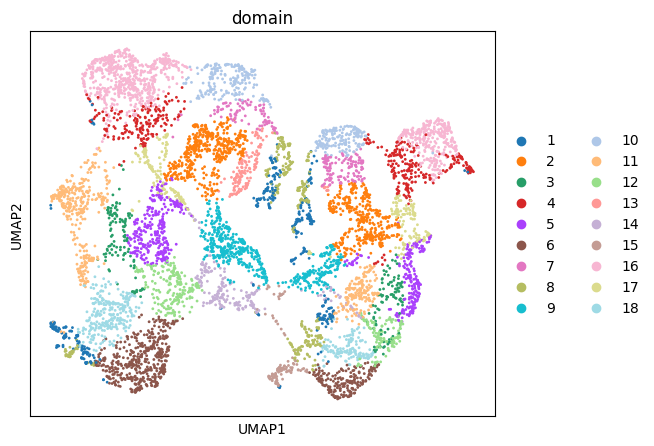

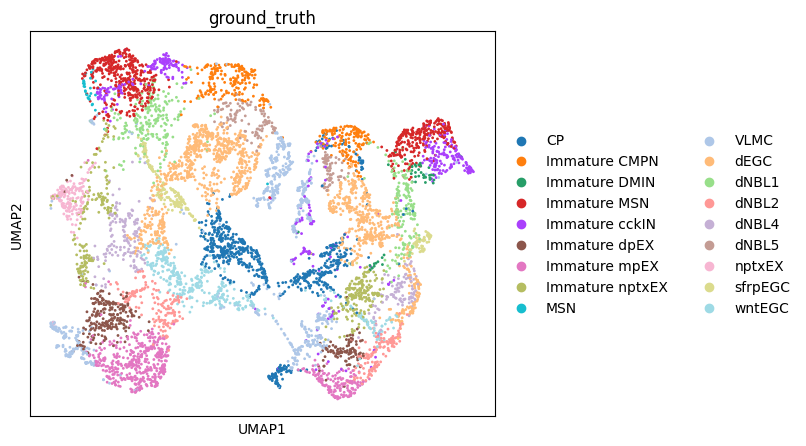

In [6]:
color=['slice','domain','ground_truth']
sc.pp.neighbors(adata, use_rep='z', metric='cosine')
sc.tl.umap(adata)
plt.rcParams['figure.figsize'] = (6, 5)
for i in color:
    sc.pl.umap(adata, color=i, show=False)
    plt.savefig('./results/'+args.catalogue+'/'+args.dataset+'/'+i+'_umap.png')
    plt.show()

In [10]:
adata=sc.read_h5ad('./results/Multi_slice/'+args.dataset+args.path3+'/STAMGC.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 7339 × 3000
    obs: 'CellID', 'spatial_leiden_e30_s8', 'Batch', 'cell_id', 'seurat_clusters', 'Annotation', 'leiden', 'ground_truth', 'slice', 'pseudo_labels', 'domain'
    var: 'n_cells', 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'ari', 'domain_colors', 'ground_truth_colors', 'hvg', 'log1p', 'nmi', 'smooth_r', 'spatial'
    obsm: 'X_pca', 'X_spatial', 'X_umap', 'emb_pca', 'gene_feat', 'graph_neigh', 'h', 'mlp', 'smooth_gene', 'spatial', 'z'


正在进行差异表达分析: Stage57_data vs Stage54_data...


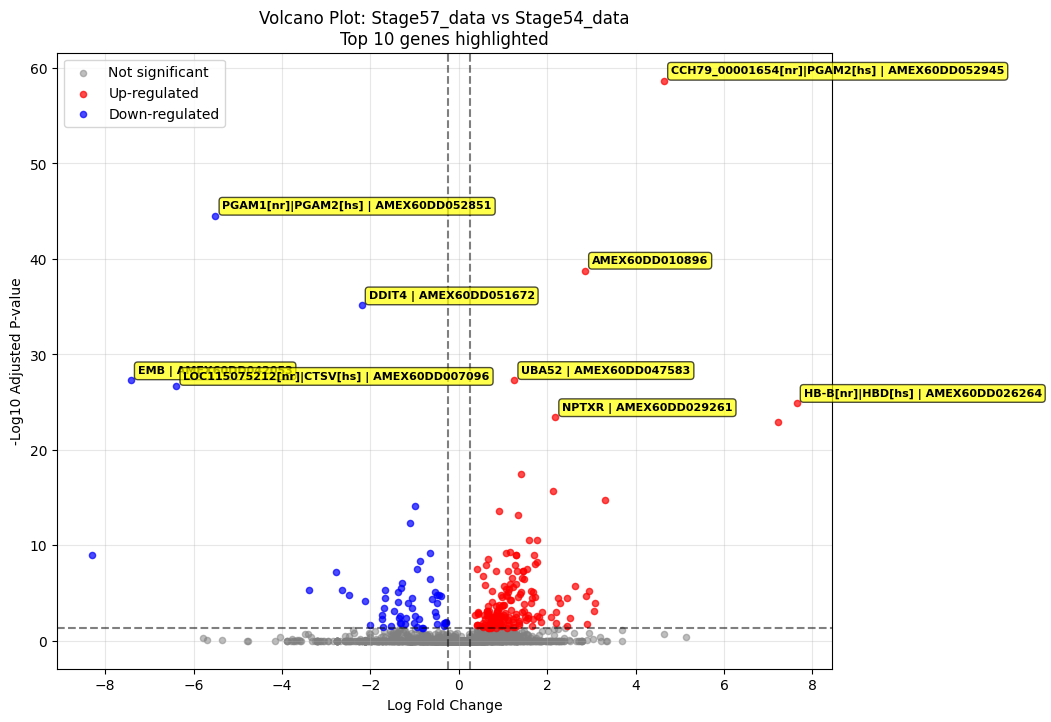

In [21]:
from package.utils import volcano_plot
adata_9=adata[adata.obs['domain']==9].copy()
top_genes,result=volcano_plot(adata_9,target_cluster='Stage57_data',target_cluster1='Stage54_data',cluster_key='slice',xlim=(-10,10),save_path='./results/Multi_slice/'+args.dataset+args.path3+'/vocano9_57_54.png')

In [11]:
# from scipy.spatial.distance import cdist
# 
# coor = adata.obsm['spatial']
# gene = adata.obsm['gene_feat']
# sigma=50
# dist_matrix = cdist(coor, coor)
# weights = np.exp(-dist_matrix ** 2 / (2 * sigma ** 2))
# weights /= np.sum(weights,1,keepdims=True)  # 归一化
# smooth_gene = weights @ gene
# adata.obsm['smooth_gene'] = smooth_gene

In [13]:
# g=22
# adata.obs['gene']=adata.obsm['gene_feat'][:,g]
# adata.obs['gaussian_smooth']=adata.obsm['smooth_gene'][:,g]
# print(adata.var_names[g])
# sc.pl.embedding(adata, basis='spatial', size=20,color=['gene','gaussian_smooth'], show=True)

In [14]:
# from package.utils import knn_adj_matrix
# from scipy.spatial.distance import cdist
# import pandas as pd
# coor = pd.DataFrame(adata.obsm['spatial'])
# coor_k_interaction = knn_adj_matrix(coor,4,metric='euclidean')
# print('1')
# 
# smooth_gene = pd.DataFrame(adata.obsm['smooth_gene'])
# smooth_gene_cosine=cdist(smooth_gene,smooth_gene,'cosine')
# print('2')
# for i in range(1):
#     smooth_gene_cosine_matrix=coor_k_interaction*smooth_gene_cosine
#     del_col_idx = smooth_gene_cosine_matrix.argmax(axis=1)  # 每行第一个最大值的列索引
#     coor_k_interaction[np.arange(len(del_col_idx)), del_col_idx] = 0
# print('3')
# coor_adj = coor_k_interaction + coor_k_interaction.T
# coor_adj = np.where(coor_adj > 1, 1, coor_adj)
# coor_adj=coor_adj-np.eye(coor_adj.shape[0])

In [15]:
# import networkx as nx
# import matplotlib.pyplot as plt
# 
# # A = coor_adj# 邻接矩阵
# A=adata.obsm['graph_neigh']
# pos = adata.obsm['spatial']# 每行对应节点的真实坐标
# 
# # 2. 建图
# G = nx.from_numpy_array(A)             # 无向图；有向加 create_using=nx.DiGraph
# 
# # 3. 把坐标转成 NetworkX 要的 dict 格式
# pos_dict = {i: pos[i] for i in range(len(pos))}
# 
# # 4. 画图
# plt.figure(figsize=(15,5))
# nx.draw(G, pos_dict,
#         with_labels=False,
#         node_color='orange',
#         edgecolors='black',
#         node_size=2,
#         font_weight='bold')
# plt.axis('equal')                      # 保持 x/y 比例一致
# plt.show()